In [104]:
from tsai.all import *
from datetime import timedelta

In [105]:
files = glob.glob('model input CSVs/*.csv')
files

['model input CSVs\\input All.csv',
 'model input CSVs\\input Forest Road.csv',
 'model input CSVs\\input Maple Drive East.csv',
 'model input CSVs\\input YMCA.csv']

In [106]:
glb = pd.DataFrame()
dfs = list()
unique_id = -1
format = '%Y-%m-%d %H:%M:%S'
time_min = timedelta(days=25)
time_step = timedelta(days=0, hours=1)
for file in files:
    unique_id +=1 
    df = pd.read_csv(file, delimiter=';')
    df = df.fillna(method='pad', limit=3)
    rows = df.shape[0]
    drop_id = np.where(df.isna())[0]

    df = df.drop(drop_id)
    df.reset_index(inplace=True)

    rows = len(df.index)
    
    unique_ids = np.zeros((rows))
    for i in range(rows-1):
        time_start = datetime.strptime(df['Time'][i], format)
        time_end = datetime.strptime(df['Time'][i+1], format)
        time_delta = time_end-time_start
        if time_delta > time_step:
            unique_id += 1
        unique_ids[i] = unique_id
    
    unique_ids[-1] = unique_id
    df['unique_id'] = unique_ids
    delete_ids = list()
    for i in range(int(unique_ids.min()), int(unique_ids.max())):
        ind = df.index[df['unique_id'] == i].tolist()
        time_start = datetime.strptime(df['Time'][ind[0]], format)
        time_end = datetime.strptime(df['Time'][ind[-1]], format)
        time_delta = time_end-time_start
        if time_delta < time_min:
            delete_ids.extend(ind)

    print(len(df.index))
    df = df.drop(delete_ids)
    print(len(df.index))

    dfs.append(df)
    glb = pd.concat([glb, df])

9626
9065
5730
2807
6798
2146
7508
5220


In [107]:
path=Path("model input CSVs")
glb.to_csv(path / 'input All.csv',sep=";",index=False)

unique_id
1.0      AxesSubplot(0.125,0.125;0.775x0.755)
3.0      AxesSubplot(0.125,0.125;0.775x0.755)
5.0      AxesSubplot(0.125,0.125;0.775x0.755)
8.0      AxesSubplot(0.125,0.125;0.775x0.755)
10.0     AxesSubplot(0.125,0.125;0.775x0.755)
12.0     AxesSubplot(0.125,0.125;0.775x0.755)
14.0     AxesSubplot(0.125,0.125;0.775x0.755)
17.0     AxesSubplot(0.125,0.125;0.775x0.755)
18.0     AxesSubplot(0.125,0.125;0.775x0.755)
20.0     AxesSubplot(0.125,0.125;0.775x0.755)
22.0     AxesSubplot(0.125,0.125;0.775x0.755)
26.0     AxesSubplot(0.125,0.125;0.775x0.755)
33.0     AxesSubplot(0.125,0.125;0.775x0.755)
35.0     AxesSubplot(0.125,0.125;0.775x0.755)
37.0     AxesSubplot(0.125,0.125;0.775x0.755)
38.0     AxesSubplot(0.125,0.125;0.775x0.755)
40.0     AxesSubplot(0.125,0.125;0.775x0.755)
43.0     AxesSubplot(0.125,0.125;0.775x0.755)
70.0     AxesSubplot(0.125,0.125;0.775x0.755)
170.0    AxesSubplot(0.125,0.125;0.775x0.755)
173.0    AxesSubplot(0.125,0.125;0.775x0.755)
174.0    AxesSubplot(0.1

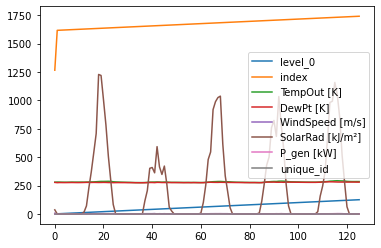

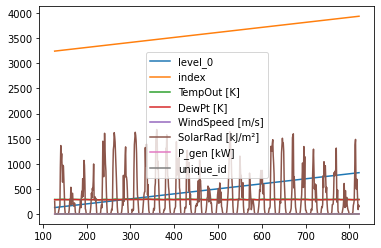

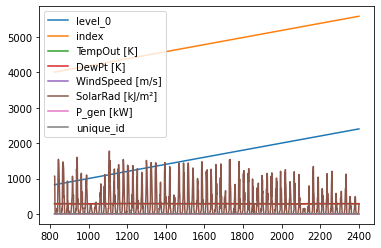

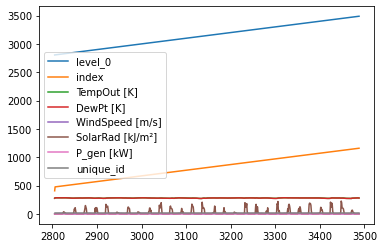

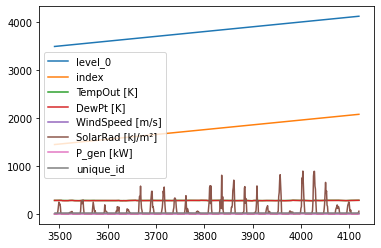

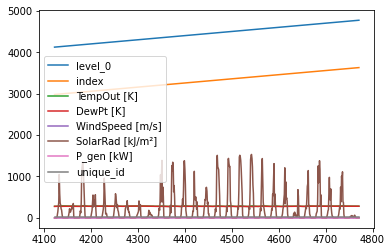

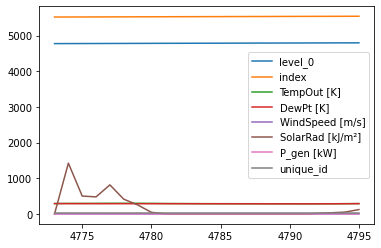

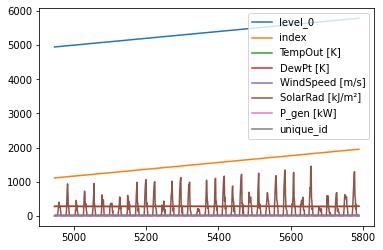

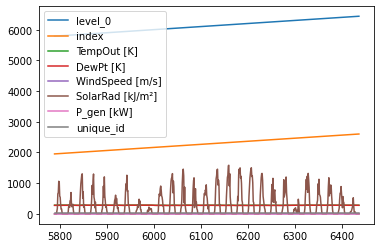

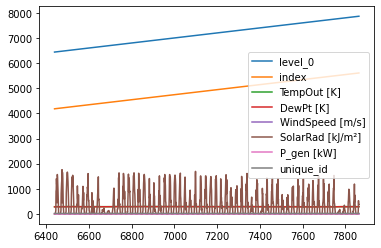

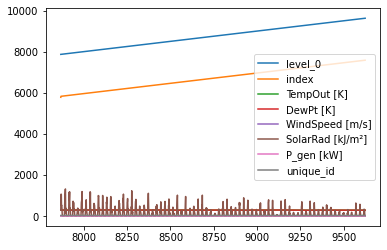

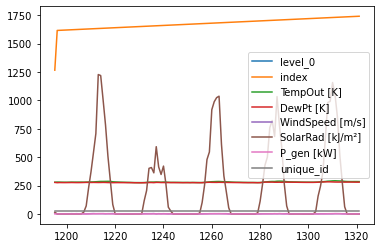

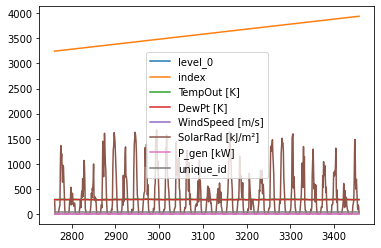

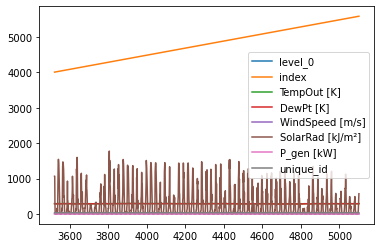

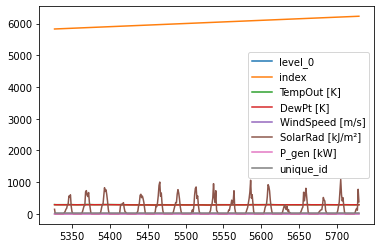

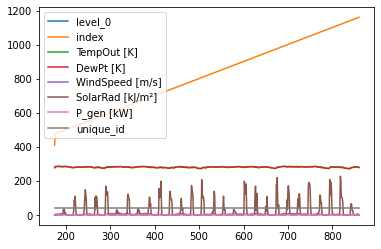

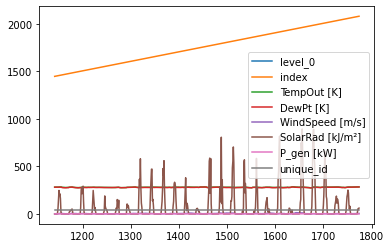

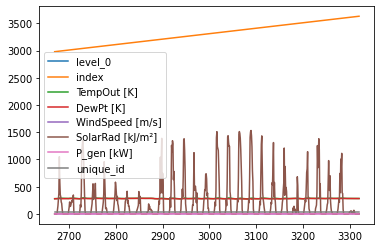

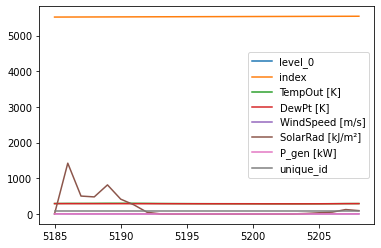

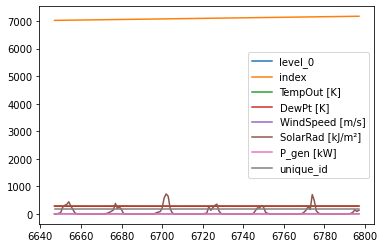

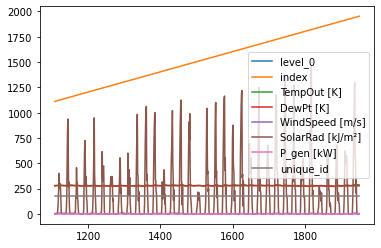

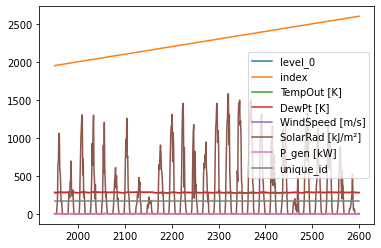

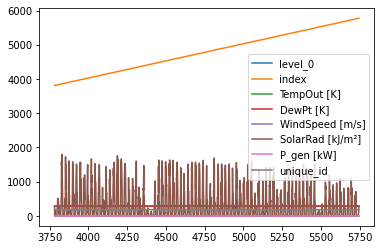

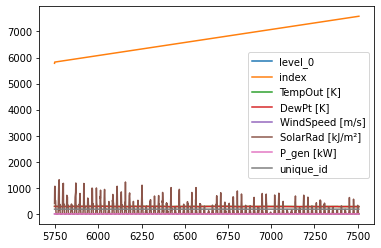

In [108]:
glb.groupby('unique_id').plot()

<AxesSubplot:>

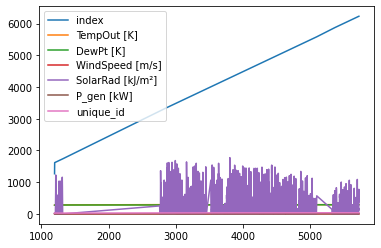

In [109]:
dfs[1].plot()

<AxesSubplot:>

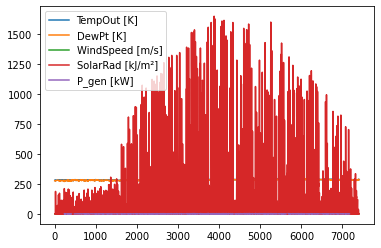

In [110]:
pd.read_csv(files[2], delimiter=';').plot()